In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os,sys
import config.Generic as generic
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score

In [354]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, title):
    width = 10
    height=6
    plt.figure(figsize=(width, height))
    
    ax1=sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2=sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    
    plt.title(title)
    plt.xlabel("Proportion of Jobs")
    plt.ylabel("Salary (in thousand dollars)")
    plt.show()
    plt.close()

In [355]:
CURRENT_DIR = os.path.dirname(os.path.abspath('./Reference'))
sys.path.append(os.path.dirname(CURRENT_DIR))

In [356]:
#Data Source Path
sourcedata=f'../SourceData/DataScienceSalary2021to2023.csv'

In [357]:
df = pd.read_csv(sourcedata)
df=df.drop(columns=['work_year','salary','salary_currency','job_title','company_location'])
#,'job_title','company_location'

In [358]:
#Initial the feature class with data frame
df_ini = generic.cls_features(df)

In [359]:
_feature , _Missing = df_ini._fun_feature_na()
#Find any Nan values within the catagorical features within dataset
if len(_feature)==0:
    print('No null values available in features')
else:
    for feature in _feature:
        print("{}: {}% missing values ".format(_feature,_Missing))
        df_ini._fun_replace_cat_feature(_feature)
        print("{} null values replaced with MISSING key values".format(feature))


No null values available in features


In [360]:

_feature , _Missing = df_ini._fun_numerical_feature_na()
#Find any Nan values within the catagorical features within dataset
if len(_feature)==0:
    print('No null values available in numerical features')
else:
    for feature in _feature:
        print("{}: {}% missing values ".format(_feature,_Missing))
        df_ini._fun_replace_numerical_feature(_feature)
        print("{} null values replaced with median values".format(feature))



No null values available in numerical features


In [361]:
# Split the Train and test data and then apply feature engineering to avoid data leakage
# Data Leakage --> If Feature engineering applied before Train and test data split 
# there might be chance of training data will be passed to test data and vice versa
# and could lead to overfitting problem

data = df.copy()
#data = data.drop(columns='salary')
data
X = data.drop(columns='salary_in_usd')
y = data['salary_in_usd']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=1)

In [362]:
print(X_train.shape)
print(X_test.shape)

(2632, 3)
(1129, 3)


In [363]:
#Convert train data to array
df_x =pd.DataFrame(X_train)
df_x.columns

Index(['experience_level', 'employment_type', 'company_size'], dtype='object')

In [364]:
#Applied One Hot encoder on the categorical features
df_re = df_ini._fun_discreteFeature_encoding(df_x)
#Convert Data Frame to array
X_train= np.array(df_re)

In [365]:
X_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [366]:
#param_grid = {'alpha': [0.1, 1.0, 10.0],
  #            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
'''param_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }'''
#alpha=10.0, solver='saga'
reg = Ridge(alpha=1.0)
#grid_search = GridSearchCV(estimator=reg,param_grid=param_grid,scoring='r2', cv=10)
reg.fit(X_train, y_train)
#best_ridge = grid_search.best_estimator_
#best_params_=grid_search.best_params_
#best_ridge
#reg.fit(X_train,y_train)

Lasso()

In [367]:
# Load new data into dataframe
test_feat = pd.DataFrame(X_test)

# Convert features to same types used in model
#test_feat['work_year']=pd.Categorical(test_feat['work_year'])
test_feat['experience_level']=pd.Categorical(test_feat['experience_level'])
test_feat['employment_type']=pd.Categorical(test_feat['employment_type'])
#test_feat['job_title']=pd.Categorical(test_feat['job_title'])
#test_feat['company_location']=pd.Categorical(test_feat['company_location'])
test_feat['company_size']=pd.Categorical(test_feat['company_size'])


# One-hot encode categorical data
test_feat = pd.get_dummies(test_feat)

# View top 5 rows of data
test_feat.head(5)

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S
3201,False,False,False,True,False,False,True,False,False,True,False
1135,False,False,False,True,False,False,True,False,False,True,False
1501,False,False,False,True,False,False,True,False,True,False,False
1301,False,False,False,True,False,False,True,False,False,True,False
1220,False,False,False,True,False,False,True,False,False,True,False


In [368]:
X_train.shape

(2632, 11)

In [369]:
test_feat.shape

(1129, 11)

In [370]:
y_pred = reg.predict(test_feat)

/home/linuxmagic/.local/share/virtualenvs/salaryprediction-NNbqYYAn/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([[<Axes: title={'center': '0'}>]], dtype=object)

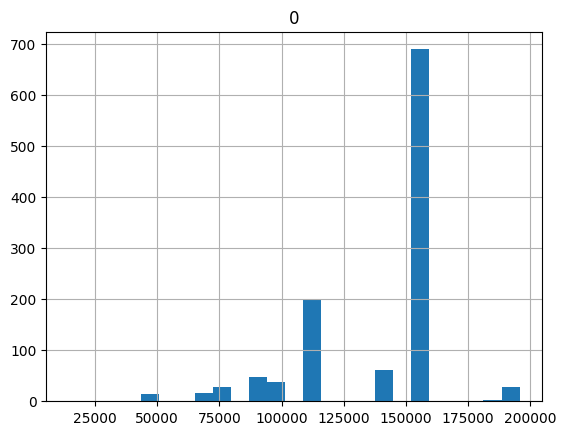

In [371]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.hist(bins=25)

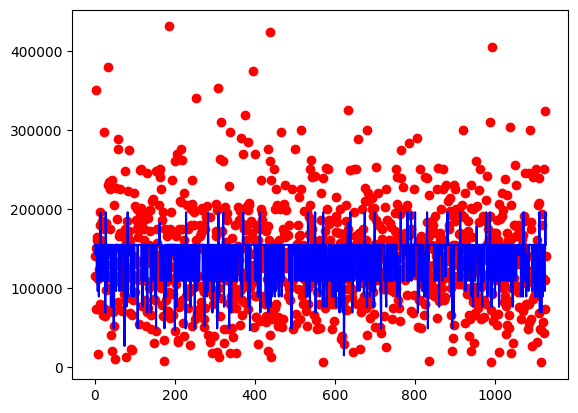

In [372]:

plt.scatter(range(len(y_test)),y_test,color='red')
plt.plot(range(len(y_pred)),y_pred,color='blue')

/tmp/ipykernel_456503/1417058473.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(RedFunction, hist=False, color="r", label=RedName)
/tmp/ipykernel_456503/1417058473.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(BlueFunction, hist=False, color="b", label=BlueNa

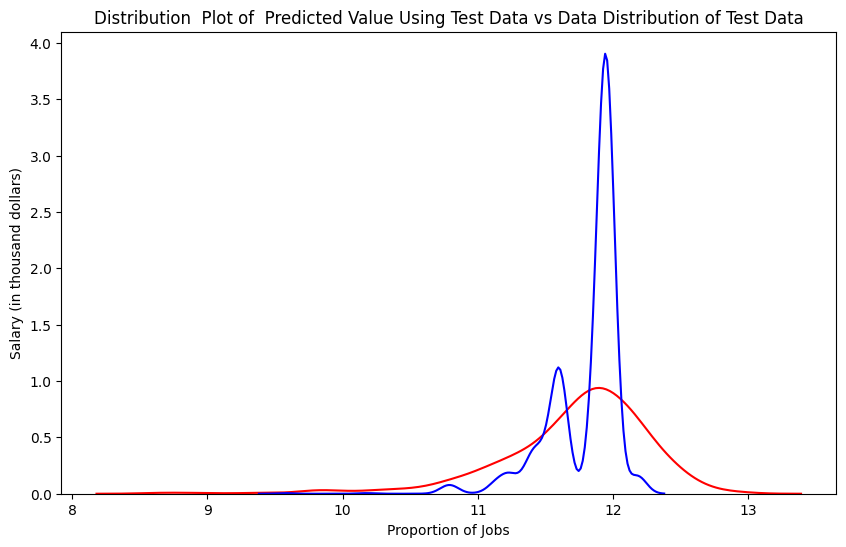

In [373]:
y_test_log =np.log(y_test)
y_pred_log =np.log(y_pred)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test_log,y_pred_log,"Actual Values (Test)","Predicted Values (Test)",Title)

In [374]:
score_r2 =r2_score(y_test,y_pred)
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)

R2 0.1933603578556249
Mean Abs 42612.56551704023
Mean Square 3169157531.495355
Root Mean Square 56295.27095143388


In [375]:
#Categorical Data Analysis and variance on salary
categorical_feature=[feature for feature in df.columns if df[feature].dtypes == 'O']
#categorical_feature

for feature in categorical_feature:
    data = df.copy()
    #data.groupby(feature)['salary_in_usd'].median().plot.bar()
    print("The Feature {} has {} unique number of categories".format(feature,len(data[feature].unique())))
    if feature == 'job_title':
        #print(df[feature].unique())
        top_10_vals = df[feature].value_counts().index[:10]
        print(top_10_vals)
        for val in top_10_vals:
            col_name = feature + '_' + val
            df[col_name] = np.where(df[feature] == val, 1, 0)


The Feature experience_level has 4 unique number of categories
The Feature employment_type has 4 unique number of categories
The Feature company_size has 3 unique number of categories


In [376]:
'''df_jobtitle = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)
df_jobtitle = pd.DataFrame(df_jobtitle)
#Display all Rows
with pd.option_context('display.max_rows', None,):
    print(df_jobtitle)'''

"df_jobtitle = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)\ndf_jobtitle = pd.DataFrame(df_jobtitle)\n#Display all Rows\nwith pd.option_context('display.max_rows', None,):\n    print(df_jobtitle)"

In [377]:
feature_na = [features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtypes!='O' and 'year' not in features]
feature_na

[]